In [1]:
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pickle
import random
import seaborn as sns
from sklearn import tree

In [ ]:
TRAINING = False # Set False for testing

In [3]:
data = pd.read_csv('../CSVs/UTKFace_sample.csv')
image_filenames = data['filename']
labels_age = data['age']
labels_gender = data['gender']
labels_ethnicity = data['race']

In [4]:
features = []
labels_age_encoded = []
labels_gender_encoded = []
labels_ethnicity_encoded = []

In [5]:
# cascade_path = 'haarcascade_frontalface_default.xml'
# face_cascade = cv2.CascadeClassifier(cascade_path)

In [6]:
def extract_features(image):
    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # if len(faces) == 0:
    #     return None
    
    # (x, y, w, h) = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)[0]
    # face_roi = image[y:y+h, x:x+w]
    # face_roi = cv2.resize(face_roi, (100, 100))
    # face_gray = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
    
    # Perform additional processing or feature extraction on 'face_gray' here
    flattened_features = gray.flatten()  
    
    # Return the processed features
    return flattened_features

In [7]:
for image_filename in image_filenames:
    image_path = os.path.join('../UTKFace/', image_filename)
    image = cv2.imread(image_path)
    img_features = extract_features(image)
    
    # If no face features are extracted, skip to the next image
    # if features is None:
    #     print("ERROR")
    #     continue
    
    # Append the extracted face features to the 'features' list
    features.append(img_features)


In [8]:
# Age labels
# Convert age ranges into age classes (0-28, 29-116)
labels_age_encoded = pd.cut(labels_age, bins=[0, 28, 116], labels=[0, 1], include_lowest=True).astype(int)

# Gender labels (0 for male, 1 for female)
labels_gender_encoded = labels_gender.astype(int)

# Ethnicity labels
labels_ethnicity_encoded = labels_ethnicity.astype(int)
ethnicity_enc = OneHotEncoder()
transformed = ethnicity_enc.fit_transform(labels_ethnicity_encoded.values.reshape(-1,1))
labels_ethnicity_encoded = transformed.toarray()


In [9]:
X_train, X_test, y_train_age, y_test_age, y_train_gender, y_test_gender, y_train_ethnicity, y_test_ethnicity = train_test_split(
    features, labels_age_encoded, labels_gender_encoded, labels_ethnicity_encoded, test_size=0.2, random_state=42
)

In [10]:
if TRAINING:
    # Age classifier
    classifier_age = DecisionTreeClassifier(criterion="gini", max_depth=9)
    classifier_age.fit(X_train, y_train_age)
else:
    classifier_age = pickle.load(open("models/age.pkl", "rb"))

predictions_age = classifier_age.predict(X_test)
accuracy_age = accuracy_score(y_test_age, predictions_age)
print(f"Age Accuracy: {accuracy_age}")

# Gender classifier
# classifier_gender = DecisionTreeClassifier(criterion="gini", max_depth=7)
# classifier_gender.fit(X_train, y_train_gender)
# predictions_gender = classifier_gender.predict(X_test)
# accuracy_gender = accuracy_score(y_test_gender, predictions_gender)
# print(f"Gender Accuracy: {accuracy_gender}")

# # Ethnicity classifier
# classifier_ethnicity = DecisionTreeClassifier()
# classifier_ethnicity.fit(X_train, y_train_ethnicity)
# predictions_ethnicity = classifier_ethnicity.predict(X_test)
# accuracy_ethnicity = accuracy_score(y_test_ethnicity, predictions_ethnicity)
# print(f"Ethnicity Accuracy: {accuracy_ethnicity}")

Age Accuracy: 0.6747521619911411


In [11]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.set(font_scale=1.4)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

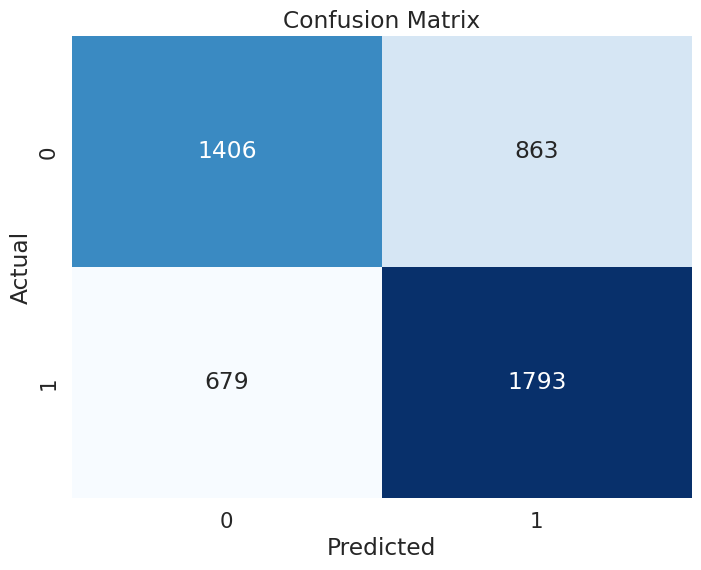

In [12]:
plot_confusion_matrix(y_test_age, predictions_age)


In [13]:
# Uncomment below code to save model

# age_pickle = open("models/age.pkl", "wb")
# pickle.dump(classifier_age,age_pickle)
# age_pickle.close()

# gender_pickle = open("models/gender.pkl", "wb")
# pickle.dump(classifier_gender,gender_pickle)
# gender_pickle.close()

# ethnicity_pickle = open("models/ethnicity.pkl", "wb")
# pickle.dump(classifier_ethnicity,ethnicity_pickle)
# ethnicity_pickle.close()

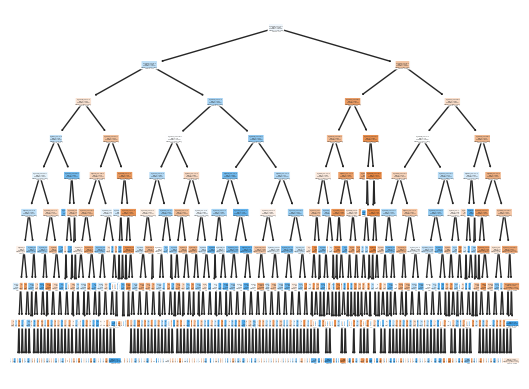

In [14]:
tree.plot_tree(classifier_age, filled=True, proportion=True, rounded=True, class_names=["<=28",">28"]) 
plt.savefig("tree.png", dpi=750)

### Restore Models:

In [ ]:
# Uncomment to load specific models:

# classifier_age = pickle.load(open("models/age.pkl", "rb"))
# classifier_gender = pickle.load(open("models/gender.pkl", "rb"))
# classifier_ethnicity = pickle.load(open("models/ethnicity.pkl", "rb"))